<a href="https://colab.research.google.com/github/divijkalra/Spam-Email-detection/blob/main/SpamMailPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing required libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# Collecting Data and Preprocessing

In [ ]:
df = pd.read_csv('spam_ham_dataset.csv')
print(df.shape)
df.head()

(5171, 4)


,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [ ]:
df.drop(['Unnamed: 0', 'label_num'], axis=1, inplace=True)

In [ ]:
print(df.shape)
df.head()

(5171, 2)


,label,text
0,ham,Subject: enron methanol ; meter # : 988291\r\n...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,spam,"Subject: photoshop , windows , office . cheap ..."
4,ham,Subject: re : indian springs\r\nthis deal is t...


Checking for missing values

In [ ]:
df.isnull().sum()

label    0
text     0
dtype: int64

In [ ]:
df['label'].value_counts()

ham     3672
spam    1499
Name: label, dtype: int64

# Label Encoding

### Labelling SPAM as 0, HAM as 1

In [ ]:
df.loc[df['label']=='spam', 'label'] = 0
df.loc[df['label']=='ham', 'label'] = 1

In [ ]:
df.head()

,label,text
0,1,Subject: enron methanol ; meter # : 988291\r\n...
1,1,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,1,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,0,"Subject: photoshop , windows , office . cheap ..."
4,1,Subject: re : indian springs\r\nthis deal is t...


In [ ]:
df['label'].value_counts()

1    3672
0    1499
Name: label, dtype: int64

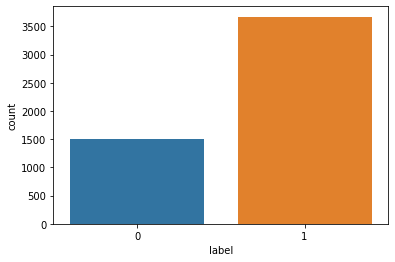

In [ ]:
sns.countplot(x=df['label'])

# Stemming the Data

In [ ]:
port_stem = PorterStemmer()

In [ ]:
def stemming(content):
  stemmed_content = re.sub('[^a-zA-Z]', ' ', str(content))
  stemmed_content = stemmed_content.lower()
  stemmed_content = stemmed_content.split()
  stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]

  stemmed_content = ' '.join(stemmed_content)
  return stemmed_content

In [ ]:
df['text'] = df['text'].apply(stemming)

In [ ]:
df.head()

,label,text
0,1,subject enron methanol meter follow note gave ...
1,1,subject hpl nom januari see attach file hplnol...
2,1,subject neon retreat ho ho ho around wonder ti...
3,0,subject photoshop window offic cheap main tren...
4,1,subject indian spring deal book teco pvr reven...


# Assigning Target and data

In [ ]:
X = df['text'].values
y = df['label'].values

In [ ]:
print(len(X))
X

5171


array(['subject enron methanol meter follow note gave monday preliminari flow data provid daren pleas overrid pop daili volum present zero reflect daili activ obtain ga control chang need asap econom purpos',
       'subject hpl nom januari see attach file hplnol xl hplnol xl',
       'subject neon retreat ho ho ho around wonder time year neon leader retreat time know time year extrem hectic tough think anyth past holiday life go past week decemb januari like think minut calend hand begin fall semest retreat schedul weekend januari youth minist confer brad dustin connect week go chang date follow weekend januari come part need think think agre import us get togeth time recharg batteri get far spring semest lot troubl difficult us get away without kid etc brad came potenti altern get togeth weekend let know prefer first option would retreat similar done past sever year year could go heartland countri inn www com outsid brenham nice place bedroom bedroom hous side side countri real relax

In [ ]:
print(len(y))
y

5171


array([1, 1, 1, ..., 1, 1, 0], dtype=object)

# Converting Text data into Numerical Data

In [ ]:
vectorizer = TfidfVectorizer()

In [ ]:
X = vectorizer.fit_transform(X)

In [ ]:
print(X.shape)

(5171, 37890)


# Splitting into Training and Testing Sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=0)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4136, 37890), (1035, 37890), (4136,), (1035,))

In [ ]:
# Converting y matrices into int format

y_train = y_train.astype('int')
y_test = y_test.astype('int')

# Model Training

Logistic Regression

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

LogisticRegression()

Decision Tree Classifier

In [ ]:
dtc = DecisionTreeClassifier()

In [ ]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

Naive Bayes Classifier

In [ ]:
nb = GaussianNB()

In [ ]:
nb.fit(X_train.toarray(), y_train)

GaussianNB()

# Model Evaluation

Logistic Regression

In [ ]:
preds_train = model.predict(X_train)
acc_train = accuracy_score(y_train, preds_train)
print('Accuracy on Training Set: ', acc_train)

Accuracy on Training Set:  0.9949226305609284


In [ ]:
preds = model.predict(X_test)
acc = accuracy_score(y_test, preds)
print('Accuracy on Testing Set: ', acc)

Accuracy on Testing Set:  0.9855072463768116


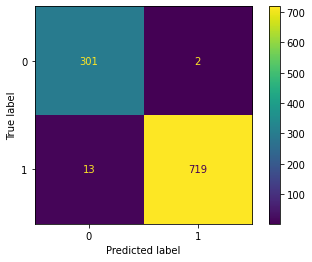

In [ ]:
plot_confusion_matrix(model, X_test, y_test)

Decision Tree Classifier

In [ ]:
preds_train = dtc.predict(X_train)
acc_train = accuracy_score(y_train, preds_train)
print('Accuracy on Training Set: ', acc_train)

Accuracy on Training Set:  1.0


In [ ]:
preds = dtc.predict(X_test)
acc = accuracy_score(y_test, preds)
print('Accuracy on Testing Set: ', acc)

Accuracy on Testing Set:  0.9217391304347826


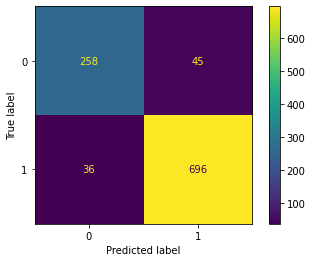

In [ ]:
plot_confusion_matrix(dtc, X_test, y_test)

Naive Bayes

In [ ]:
preds = nb.predict(X_train.toarray())
acc = accuracy_score(y_train, preds)
print('Accuracy on Training Set: ', acc)

Accuracy on Training Set:  0.9859767891682786


In [ ]:
preds = nb.predict(X_test.toarray())
acc = accuracy_score(y_test, preds)
print('Accuracy on Testing Set: ', acc)

Accuracy on Testing Set:  0.9449275362318841


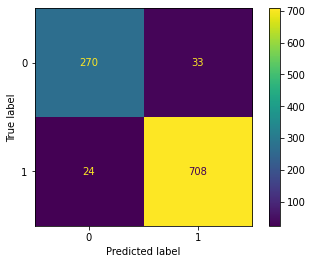

In [ ]:
plot_confusion_matrix(nb, X_test.toarray(), y_test)

# Predictive System

In [ ]:
input = ['Important changes to your Tableau Public Account']

# Preprocessing
stemmed_input = stemming(input)
transformed_input = vectorizer.transform(np.array([stemmed_input]))

# Prediction
prediction = model.predict(transformed_input)

if prediction == np.array([0]):
  print('Input Mail is SPAM.')
else:
  print('Input Mail is HAM.')

Input Mail is HAM.


In [ ]:
input = ['Only a Few Spots Left for 2024 applicants to register for Roadmap to Study Abroad Webinar!!']
stemmed_input = stemming(input)
transformed_input = vectorizer.transform(np.array([stemmed_input]))
prediction = model.predict(transformed_input)

if prediction == np.array([0]):
  print('Input Mail is SPAM.')
else:
  print('Input Mail is HAM.')

Input Mail is SPAM.
